In [ ]:
# Most are pre-installed, but just in case:
!pip install tensorflow matplotlib scikit-learn opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for name in files:
        if name.endswith('.zip'):
            print(os.path.join(root, name))


/content/drive/MyDrive/Brain Tumor Datasets/dataset1.zip
/content/drive/MyDrive/Brain Tumor Datasets/dataset2.zip


In [ ]:
import zipfile

# Unzip dataset1.zip
with zipfile.ZipFile('/content/drive/MyDrive/Brain Tumor Datasets/dataset1.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset1')

# Unzip dataset2.zip
with zipfile.ZipFile('/content/drive/MyDrive/Brain Tumor Datasets/dataset2.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset2')


In [ ]:
import os
print("Dataset 1:", os.listdir('dataset1'))
print("Dataset 2:", os.listdir('dataset2'))


Dataset 1: ['yes', 'brain_tumor_dataset', 'no']
Dataset 2: ['Training', 'Testing']


In [ ]:
import os

combined_dir = 'all_brain_mri'
os.makedirs(combined_dir, exist_ok=True)
for label in ['yes', 'no']:
    os.makedirs(os.path.join(combined_dir, label), exist_ok=True)


In [ ]:
import shutil

for label in ['yes', 'no']:
    src_folder = os.path.join('dataset1', label)
    dst_folder = os.path.join(combined_dir, label)
    for fname in os.listdir(src_folder):
        src_path = os.path.join(src_folder, fname)
        dst_path = os.path.join(dst_folder, fname)
        if os.path.isfile(src_path):
            shutil.copy(src_path, dst_path)


In [ ]:
print("Training subfolders:", os.listdir('dataset2/Training'))
print("Testing subfolders:", os.listdir('dataset2/Testing'))


Training subfolders: ['meningioma', 'notumor', 'glioma', 'pituitary']
Testing subfolders: ['meningioma', 'notumor', 'glioma', 'pituitary']


In [ ]:
tumor_classes = ['meningioma', 'glioma', 'pituitary']
no_tumor_class = ['notumor']

# Copy tumor images
for split in ['Training', 'Testing']:
    for label in tumor_classes:
        src_folder = os.path.join('dataset2', split, label)
        dst_folder = os.path.join(combined_dir, 'yes')
        for fname in os.listdir(src_folder):
            src_path = os.path.join(src_folder, fname)
            dst_path = os.path.join(dst_folder, f"{label}_{split}_{fname}")
            if os.path.isfile(src_path):
                shutil.copy(src_path, dst_path)

# Copy no tumor images
for split in ['Training', 'Testing']:
    for label in no_tumor_class:
        src_folder = os.path.join('dataset2', split, label)
        dst_folder = os.path.join(combined_dir, 'no')
        for fname in os.listdir(src_folder):
            src_path = os.path.join(src_folder, fname)
            dst_path = os.path.join(dst_folder, f"{label}_{split}_{fname}")
            if os.path.isfile(src_path):
                shutil.copy(src_path, dst_path)


In [ ]:
print('Tumor images:', len(os.listdir('all_brain_mri/yes')))
print('No Tumor images:', len(os.listdir('all_brain_mri/no')))


Tumor images: 5178
No Tumor images: 2098


In [ ]:
import numpy as np
import cv2

IMG_SIZE = 128  # You can use 128 or 224 for better accuracy (tradeoff: more RAM needed)

data = []
labels = []

for label, folder in enumerate(['no', 'yes']):
    folder_path = os.path.join(combined_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
        except Exception as e:
            pass  # skip unreadable images

X = np.array(data, dtype='float32') / 255.0  # normalize to [0,1]
y = np.array(labels)

print("Total images loaded:", len(X))
print("Shape of data:", X.shape)
print("Label distribution:", np.bincount(y))


Total images loaded: 7276
Shape of data: (7276, 128, 128)
Label distribution: [2098 5178]


In [ ]:
X = X[..., np.newaxis]  # Shape will be (7276, 128, 128, 1)
print("New shape:", X.shape)


New shape: (7276, 128, 128, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Train labels:", np.bincount(y_train))
print("Validation labels:", np.bincount(y_val))


Train set: (6184, 128, 128, 1) (6184,)
Validation set: (1092, 128, 128, 1) (1092,)
Train labels: [1783 4401]
Validation labels: [315 777]


In [ ]:
atten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizeimport tensorflow as tf
from tensorflow.keras import layers, models

def build_custom_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flr='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_custom_cnn((128, 128, 1))
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Save best model weights to file
checkpoint_cb = ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[earlystop_cb, checkpoint_cb],
    verbose=1
)


Epoch 1/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7925 - loss: 0.4320

194/194 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7929 - loss: 0.4313 - val_accuracy: 0.9203 - val_loss: 0.1976
Epoch 2/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9345 - loss: 0.1676

194/194 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9344 - loss: 0.1676 - val_accuracy: 0.9377 - val_loss: 0.1606
Epoch 3/30
192/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9496 - loss: 0.1316

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9496 - loss: 0.1316 - val_accuracy: 0.9570 - val_loss: 0.1159
Epoch 4/30
192/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9559 - loss: 0.1036

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9560 - loss: 0.1036 - val_accuracy: 0.9606 - val_loss: 0.0981
Epoch 5/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9644 - loss: 0.0886 - val_accuracy: 0.9689 - val_loss: 0.1017
Epoch 6/30
192/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9720 - loss: 0.0693

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9720 - loss: 0.0692 - val_accuracy: 0.9744 - val_loss: 0.0689
Epoch 7/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9799 - loss: 0.0528 - val_accuracy: 0.9579 - val_loss: 0.1313
Epoch 8/30
192/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9812 - loss: 0.0531

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9812 - loss: 0.0530 - val_accuracy: 0.9844 - val_loss: 0.0523
Epoch 9/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9867 - loss: 0.0357 - val_accuracy: 0.9762 - val_loss: 0.0818
Epoch 10/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9892 - loss: 0.0287 - val_accuracy: 0.9853 - val_loss: 0.0569
Epoch 11/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9829 - loss: 0.0491

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9830 - loss: 0.0490 - val_accuracy: 0.9863 - val_loss: 0.0476
Epoch 12/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9933 - loss: 0.0165 - val_accuracy: 0.9835 - val_loss: 0.0808
Epoch 13/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9780 - val_loss: 0.0893
Epoch 14/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9817 - val_loss: 0.0534
Epoch 15/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9944 - loss: 0.0135 - val_accuracy: 0.9863 - val_loss: 0.0830
Epoch 16/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9959 - loss: 0.0090 - val_accuracy: 0.9853 - val_loss: 0.1104


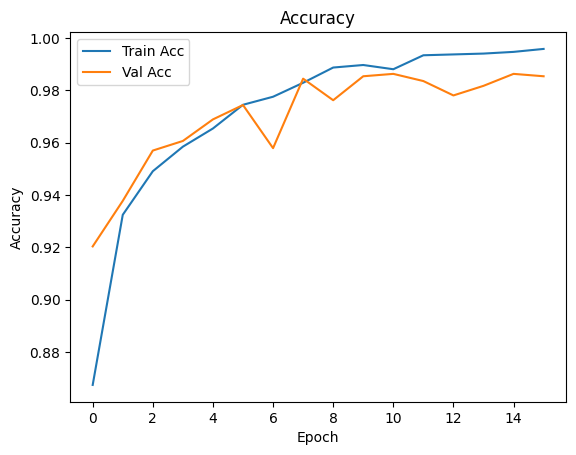

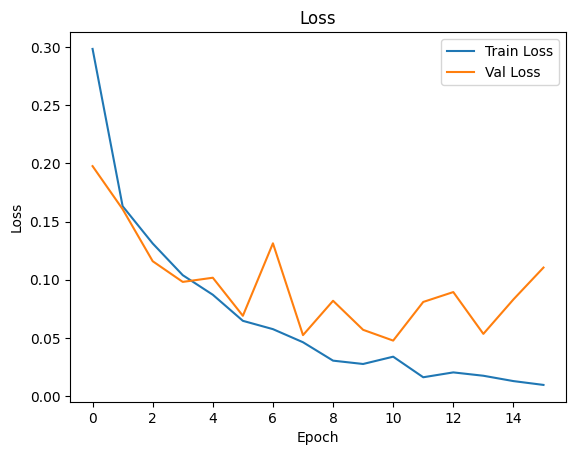

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

    No Tumor       0.97      0.98      0.98       315
       Tumor       0.99      0.99      0.99       777

    accuracy                           0.99      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.99      0.99      0.99      1092



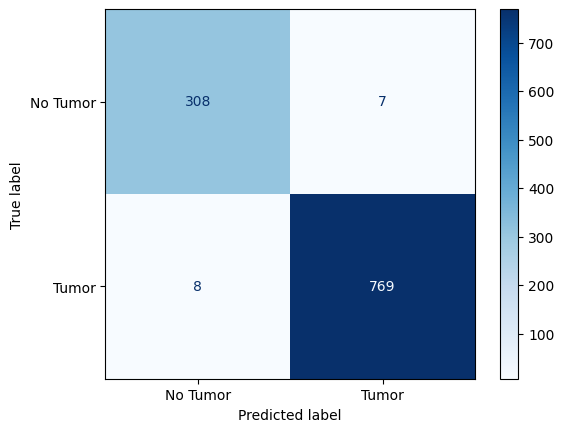

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred_prob = cnn_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(classification_report(y_val, y_pred, target_names=['No Tumor', 'Tumor']))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
#second CNN
def build_custom_cnn_v2(input_shape):
    model = models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model2 = build_custom_cnn_v2((128, 128, 1))
cnn_model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,645,121 (25.35 MB)

 Trainable params: 6,645,121 (25.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# EarlyStopping and ModelCheckpoint for ensemble model
checkpoint_cb2 = ModelCheckpoint('best_cnn_model2.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = cnn_model2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[earlystop_cb2, checkpoint_cb2],
    verbose=1
)


Epoch 1/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7907 - loss: 0.4404

194/194 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.7911 - loss: 0.4397 - val_accuracy: 0.9350 - val_loss: 0.1934
Epoch 2/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9426 - loss: 0.1453

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9426 - loss: 0.1454 - val_accuracy: 0.9441 - val_loss: 0.1496
Epoch 3/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9572 - loss: 0.1193

194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9572 - loss: 0.1193 - val_accuracy: 0.9615 - val_loss: 0.1091
Epoch 4/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9652 - loss: 0.0903

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9653 - loss: 0.0902 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 5/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9769 - loss: 0.0627

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9769 - loss: 0.0627 - val_accuracy: 0.9789 - val_loss: 0.0667
Epoch 6/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9849 - loss: 0.0419 - val_accuracy: 0.9789 - val_loss: 0.0700
Epoch 7/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9874 - loss: 0.0357 - val_accuracy: 0.9835 - val_loss: 0.0668
Epoch 8/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9906 - loss: 0.0237

194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9906 - loss: 0.0238 - val_accuracy: 0.9835 - val_loss: 0.0588
Epoch 9/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9597 - val_loss: 0.2526
Epoch 10/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9844 - val_loss: 0.0652
Epoch 11/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9956 - loss: 0.0189

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9956 - loss: 0.0188 - val_accuracy: 0.9890 - val_loss: 0.0526
Epoch 12/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9968 - loss: 0.0082 - val_accuracy: 0.9881 - val_loss: 0.0849
Epoch 13/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9981 - loss: 0.0088 - val_accuracy: 0.9863 - val_loss: 0.0720
Epoch 14/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9966 - loss: 0.0103

194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9826 - val_loss: 0.0480
Epoch 15/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9976 - loss: 0.0089 - val_accuracy: 0.9881 - val_loss: 0.0723
Epoch 16/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9973 - loss: 0.0060 - val_accuracy: 0.9689 - val_loss: 0.1344
Epoch 17/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9975 - loss: 0.0115 - val_accuracy: 0.9753 - val_loss: 0.1218
Epoch 18/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9927 - loss: 0.0260 - val_accuracy: 0.9863 - val_loss: 0.0683
Epoch 19/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9980 - loss: 0.0056 - val_accuracy: 0.9872 - val_loss: 0.0863


In [ ]:
#third CNN
def build_custom_cnn_v3(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (5,5), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model3 = build_custom_cnn_v3((128, 128, 1))
cnn_model3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 124, 124, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124, 124, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,841 (3.28 MB)

 Trainable params: 859,521 (3.28 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
checkpoint_cb3 = ModelCheckpoint('best_cnn_model3.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history3 = cnn_model3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[earlystop_cb3, checkpoint_cb3],
    verbose=1
)


Epoch 1/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8581 - loss: 0.5452

194/194 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8583 - loss: 0.5441 - val_accuracy: 0.7921 - val_loss: 0.4143
Epoch 2/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9364 - loss: 0.1583

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9365 - loss: 0.1583 - val_accuracy: 0.8636 - val_loss: 0.3330
Epoch 3/30
192/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9378 - loss: 0.1600

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9379 - loss: 0.1596 - val_accuracy: 0.9432 - val_loss: 0.1518
Epoch 4/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9497 - loss: 0.1147 - val_accuracy: 0.7079 - val_loss: 1.4710
Epoch 5/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9513 - loss: 0.1459

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9513 - loss: 0.1458 - val_accuracy: 0.9698 - val_loss: 0.0820
Epoch 6/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9657 - loss: 0.0846 - val_accuracy: 0.9734 - val_loss: 0.0851
Epoch 7/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9722 - loss: 0.0676

194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9722 - loss: 0.0676 - val_accuracy: 0.9835 - val_loss: 0.0652
Epoch 8/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9802 - loss: 0.0527 - val_accuracy: 0.9689 - val_loss: 0.0917
Epoch 9/30
191/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9785 - loss: 0.0565

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9785 - loss: 0.0564 - val_accuracy: 0.9844 - val_loss: 0.0522
Epoch 10/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9851 - loss: 0.0366 - val_accuracy: 0.9780 - val_loss: 0.0742
Epoch 11/30
193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9884 - loss: 0.0268

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9884 - loss: 0.0268 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 12/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9854 - loss: 0.0435 - val_accuracy: 0.9789 - val_loss: 0.0562
Epoch 13/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9861 - loss: 0.0324 - val_accuracy: 0.9780 - val_loss: 0.0700
Epoch 14/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9855 - loss: 0.0350 - val_accuracy: 0.9835 - val_loss: 0.0569
Epoch 15/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9902 - loss: 0.0272 - val_accuracy: 0.9789 - val_loss: 0.0989
Epoch 16/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9744 - val_loss: 0.0659


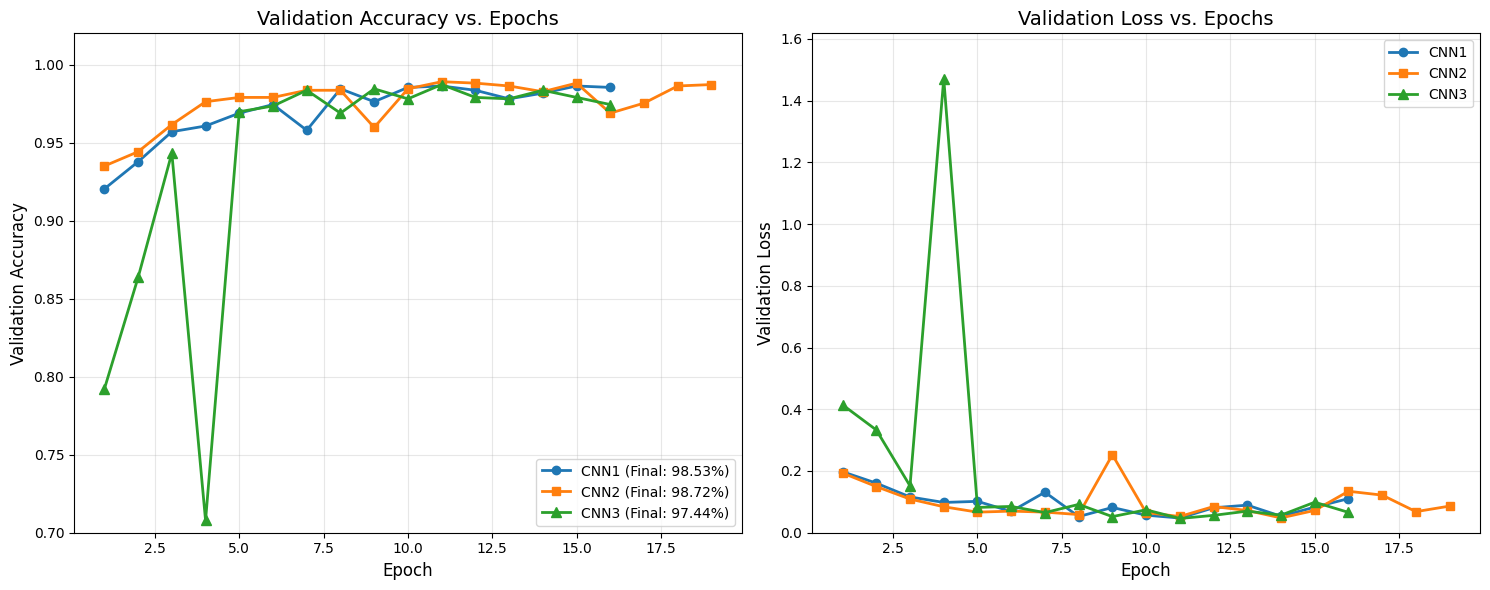

In [ ]:
import matplotlib.pyplot as plt

# Get validation accuracy and loss for each model
val_acc1 = history.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']

val_loss1 = history.history['val_loss']
val_loss2 = history2.history['val_loss']
val_loss3 = history3.history['val_loss']

epochs1 = range(1, len(val_acc1) + 1)
epochs2 = range(1, len(val_acc2) + 1)
epochs3 = range(1, len(val_acc3) + 1)

plt.figure(figsize=(15, 6))

# -- Subplot 1: Validation Accuracy --
plt.subplot(1, 2, 1)
plt.plot(epochs1, val_acc1, '-o', label=f'CNN1 (Final: {val_acc1[-1]*100:.2f}%)', linewidth=2, markersize=6)
plt.plot(epochs2, val_acc2, '-s', label=f'CNN2 (Final: {val_acc2[-1]*100:.2f}%)', linewidth=2, markersize=6)
plt.plot(epochs3, val_acc3, '-^', label=f'CNN3 (Final: {val_acc3[-1]*100:.2f}%)', linewidth=2, markersize=7)
plt.title('Validation Accuracy vs. Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.ylim(0.7, 1.02)
plt.legend()
plt.grid(alpha=0.3)

# -- Subplot 2: Validation Loss --
plt.subplot(1, 2, 2)
plt.plot(epochs1, val_loss1, '-o', label='CNN1', linewidth=2, markersize=6)
plt.plot(epochs2, val_loss2, '-s', label='CNN2', linewidth=2, markersize=6)
plt.plot(epochs3, val_loss3, '-^', label='CNN3', linewidth=2, markersize=7)
plt.title('Validation Loss vs. Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Loss', fontsize=12)
plt.ylim(0, max(max(val_loss1), max(val_loss2), max(val_loss3))*1.1)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("cnn_val_acc_and_loss.png", dpi=300)
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
== Ensemble of 3 Custom CNNs ==
              precision    recall  f1-score   support

    No Tumor       0.97      0.98      0.98       315
       Tumor       0.99      0.99      0.99       777

    accuracy                           0.99      1092
   macro avg       0.98      0.98      0.98      1092
weighted avg       0.99      0.99      0.99      1092



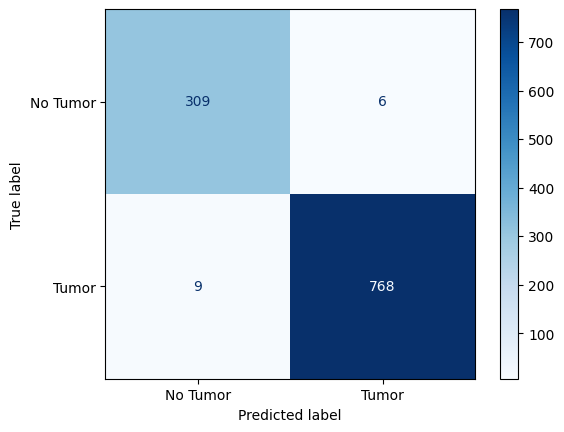

In [ ]:
# Get probability predictions from each model
y_pred1 = cnn_model.predict(X_val)
y_pred2 = cnn_model2.predict(X_val)
y_pred3 = cnn_model3.predict(X_val)

# Ensemble: Average their predictions
y_pred_ensemble = (y_pred1 + y_pred2 + y_pred3) / 3

# Convert to final class labels (threshold=0.5)
y_pred_ensemble_cls = (y_pred_ensemble > 0.5).astype(int).flatten()

# Evaluate the ensemble
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("== Ensemble of 3 Custom CNNs ==")
print(classification_report(y_val, y_pred_ensemble_cls, target_names=['No Tumor', 'Tumor']))

cm = confusion_matrix(y_val, y_pred_ensemble_cls)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor']).plot(cmap='Blues')
plt.show()


In [ ]:
!pip install xgboost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:16:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


== Stacking Ensemble (XGBoost Meta-Learner) ==
              precision    recall  f1-score   support

    No Tumor       1.00      1.00      1.00       315
       Tumor       1.00      1.00      1.00       777

    accuracy                           1.00      1092
   macro avg       1.00      1.00      1.00      1092
weighted avg       1.00      1.00      1.00      1092



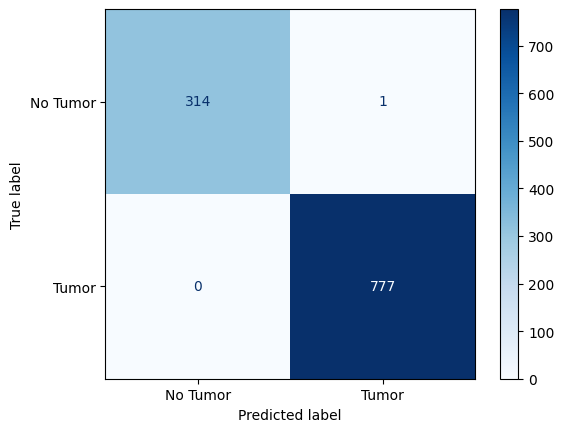

In [ ]:
import xgboost as xgb

# Stack the CNN outputs as features
X_stack = np.hstack([y_pred1, y_pred2, y_pred3])

# XGBoost expects integer labels
meta_model = xgb.XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model.fit(X_stack, y_val)

# Predict with meta-model
y_pred_stack = meta_model.predict(X_stack)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("== Stacking Ensemble (XGBoost Meta-Learner) ==")
print(classification_report(y_val, y_pred_stack, target_names=['No Tumor', 'Tumor']))

cm = confusion_matrix(y_val, y_pred_stack)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor']).plot(cmap='Blues')
plt.show()


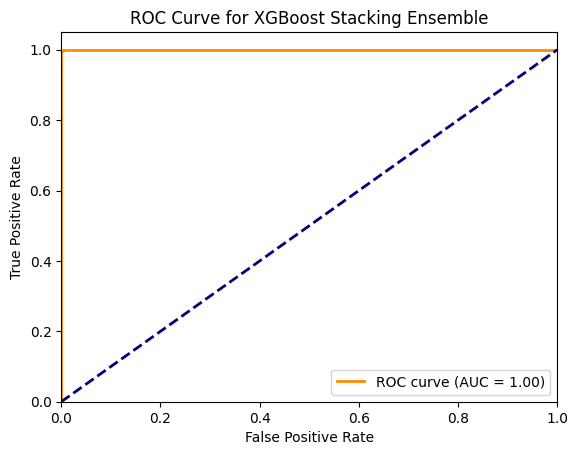

In [ ]:
from sklearn.metrics import roc_curve, auc

# For XGBoost, get probability for class 1
y_pred_stack_proba = meta_model.predict_proba(X_stack)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_stack_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Stacking Ensemble')
plt.legend(loc="lower right")
plt.show()


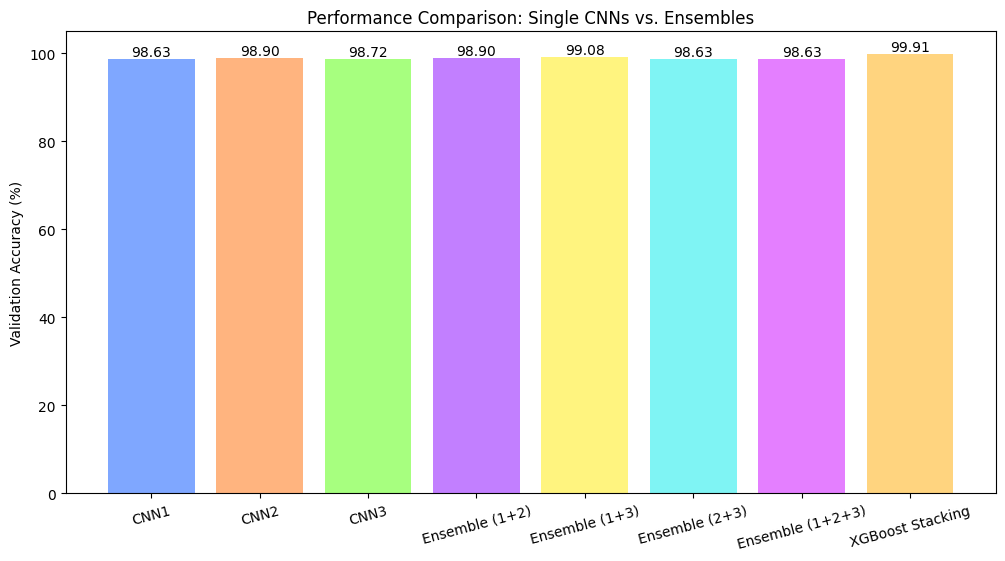

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(names, [round(a,2) for a in accuracies],
               color=['#7fa7ff', '#ffb47f', '#a7ff7f', '#c27fff', '#fff47f', '#7ff4f4', '#e47fff', '#ffd47f'])
plt.ylim(0, 105)
plt.ylabel('Validation Accuracy (%)')
plt.title('Performance Comparison: Single CNNs vs. Ensembles')
plt.bar_label(bars, fmt='%.2f')
plt.xticks(rotation=15)
plt.show()
